In [2]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import welch

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data2/heart_rate.csv')
df

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359
...,...,...,...,...
1795,103.7900,98.6842,NaN,NaN
1796,101.6230,98.6842,NaN,NaN
1797,99.5679,99.0005,NaN,NaN
1798,99.1835,99.3273,NaN,NaN


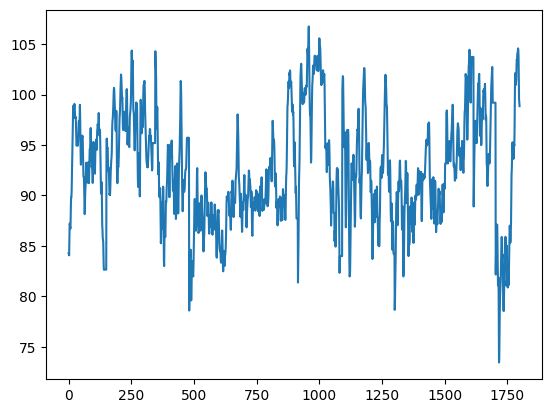

In [4]:
print(plt.plot(df["T1"]))

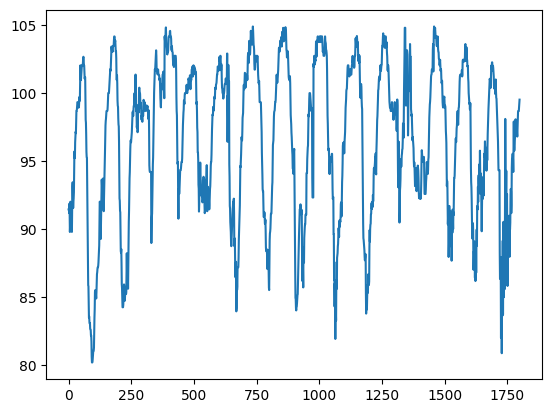

In [5]:
print(plt.plot(df["T2"]))

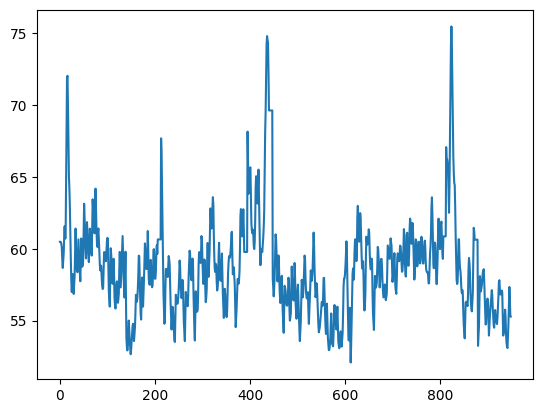

In [6]:
print(plt.plot(df["T3"]))

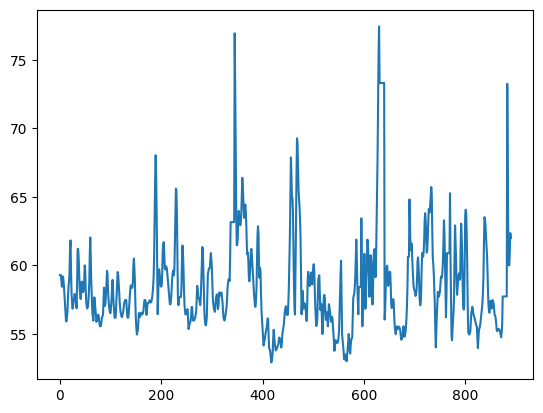

In [7]:
print(plt.plot(df["T4"]))

In [8]:
df_12 = df[['T1','T2']]

<ipython-input-26-295869164>:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lf_power = np.trapz(psd[lf_band], f[lf_band])
<ipython-input-26-295869164>:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  hf_power = np.trapz(psd[hf_band], f[hf_band])


LF Power: 4.95
HF Power: 1.22


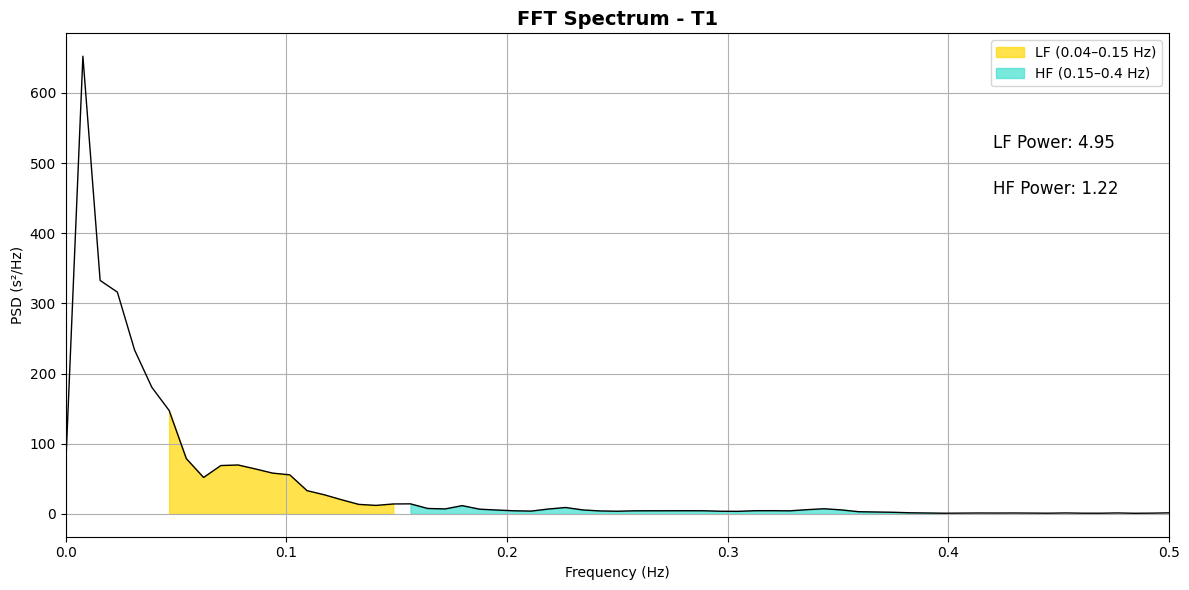

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Giả sử bạn có dữ liệu t1
t1 = df["T1"]

fs = 2.0  # Sampling frequency (Hz) vì mỗi 0.5 giây có 1 điểm → 2 Hz

# Tính Power Spectral Density (PSD) bằng phương pháp Welch
f, psd = welch(t1, fs=fs, nperseg=256)

# Xác định vùng tần số LF (0.04–0.15 Hz) và HF (0.15–0.4 Hz)
lf_band = (f >= 0.04) & (f <= 0.15)
hf_band = (f > 0.15) & (f <= 0.4)

# Tính công suất bằng cách tích phân (xấp xỉ) PSD trong từng vùng
lf_power = np.trapz(psd[lf_band], f[lf_band])
hf_power = np.trapz(psd[hf_band], f[hf_band])

# Vẽ phổ công suất
plt.figure(figsize=(12, 6))
plt.plot(f, psd, color='black', linewidth=1)
plt.fill_between(f[lf_band], psd[lf_band], color='gold', alpha=0.7, label='LF (0.04–0.15 Hz)')
plt.fill_between(f[hf_band], psd[hf_band], color='turquoise', alpha=0.7, label='HF (0.15–0.4 Hz)')

# Hiển thị giá trị LF và HF trên đồ thị
plt.title('FFT Spectrum - T1', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (s²/Hz)')
plt.legend()
plt.grid(True)

# In giá trị LF và HF
print(f"LF Power: {lf_power:.2f}")
print(f"HF Power: {hf_power:.2f}")
plt.text(0.42, max(psd)*0.8, f"LF Power: {lf_power:.2f}", fontsize=12)
plt.text(0.42, max(psd)*0.7, f"HF Power: {hf_power:.2f}", fontsize=12)

plt.xlim(0, 0.5)
plt.tight_layout()
plt.show()


<ipython-input-27-988819103>:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lf_power = np.trapz(psd[lf_mask], f[lf_mask])
<ipython-input-27-988819103>:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  hf_power = np.trapz(psd[hf_mask], f[hf_mask])
<ipython-input-27-988819103>:58: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


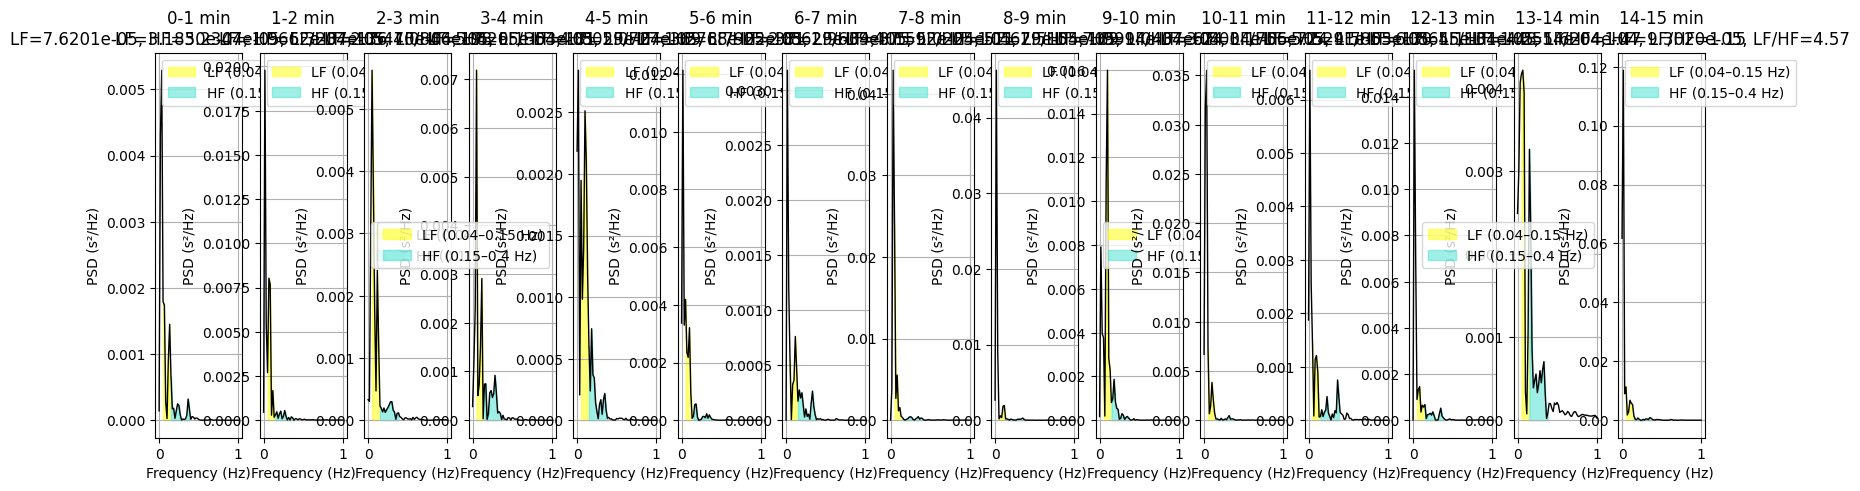

Đoạn 0-1 min: LF = 7.620124e-05, HF = 3.234682e-05, LF/HF = 2.36
Đoạn 1-2 min: LF = 3.184966e-04, HF = 5.323748e-05, LF/HF = 5.98
Đoạn 2-3 min: LF = 1.966165e-04, HF = 4.084569e-05, LF/HF = 4.81
Đoạn 3-4 min: LF = 1.547029e-04, HF = 9.135258e-05, LF/HF = 1.69
Đoạn 4-5 min: LF = 1.426533e-04, HF = 5.072668e-05, LF/HF = 2.81
Đoạn 5-6 min: LF = 1.802873e-04, HF = 3.792200e-05, LF/HF = 4.75
Đoạn 6-7 min: LF = 3.276814e-05, HF = 2.963928e-05, LF/HF = 1.11
Đoạn 7-8 min: LF = 3.862888e-04, HF = 5.022364e-05, LF/HF = 7.69
Đoạn 8-9 min: LF = 8.159155e-05, HF = 2.515473e-05, LF/HF = 3.24
Đoạn 9-10 min: LF = 5.467870e-04, HF = 1.043742e-04, LF/HF = 5.24
Đoạn 10-11 min: LF = 1.999388e-04, HF = 3.175573e-05, LF/HF = 6.30
Đoạn 11-12 min: LF = 6.800405e-05, HF = 4.585340e-05, LF/HF = 1.48
Đoạn 12-13 min: LF = 7.529147e-05, HF = 5.113131e-05, LF/HF = 1.47
Đoạn 13-14 min: LF = 1.864530e-04, HF = 1.620389e-04, LF/HF = 1.15
Đoạn 14-15 min: LF = 4.255391e-04, HF = 9.301964e-05, LF/HF = 4.57


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

fs = 2  # tần số lấy mẫu 2Hz

segment_length = 60 * fs  # số mẫu trong 1 phút (60 giây * 2 mẫu/giây = 120 mẫu)

# Tạo danh sách các đoạn (label, segment_data)
segments = {}
num_segments = len(t1) // segment_length
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = start_idx + segment_length
    label = f"{i}-{i+1} min"
    segments[label] = t1[start_idx:end_idx]

lf_band = (0.04, 0.15)
hf_band = (0.15, 0.40)

lf_powers = []
hf_powers = []
lf_hf_ratios = []

plt.figure(figsize=(20, 5))

for i, (label, segment) in enumerate(segments.items()):
    # Chuyển BPM sang RR intervals (giây)
    rr_segment = 60 / segment

    # Tính PSD với nperseg không vượt quá độ dài segment
    nperseg = min(256, len(rr_segment))
    f, psd = welch(rr_segment, fs=fs, nperseg=nperseg)

    # Tạo mask cho LF và HF
    lf_mask = (f >= lf_band[0]) & (f < lf_band[1])
    hf_mask = (f >= hf_band[0]) & (f < hf_band[1])

    lf_power = np.trapz(psd[lf_mask], f[lf_mask])
    hf_power = np.trapz(psd[hf_mask], f[hf_mask])

    lf_powers.append(lf_power)
    hf_powers.append(hf_power)

    ratio = lf_power / hf_power if hf_power > 0 else np.nan
    lf_hf_ratios.append(ratio)

    plt.subplot(1, num_segments, i+1)
    plt.plot(f, psd, color='black', linewidth=1)
    plt.fill_between(f[lf_mask], psd[lf_mask], color='yellow', alpha=0.5, label='LF (0.04–0.15 Hz)')
    plt.fill_between(f[hf_mask], psd[hf_mask], color='turquoise', alpha=0.5, label='HF (0.15–0.4 Hz)')
    plt.title(f'{label}\nLF={lf_power:.4e}, HF={hf_power:.4e}, LF/HF={ratio:.2f}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (s²/Hz)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# In ra bảng LF, HF và LF/HF ratio từng đoạn
for i, label in enumerate(segments.keys()):
    print(f"Đoạn {label}: LF = {lf_powers[i]:.6e}, HF = {hf_powers[i]:.6e}, LF/HF = {lf_hf_ratios[i]:.2f}")


Ngưỡng LF/HF: 2.000000
Đoạn 0-1 min: Anomaly, LF/HF = 2.355756
Đoạn 1-2 min: Anomaly, LF/HF = 5.982564
Đoạn 2-3 min: Anomaly, LF/HF = 4.813642
Đoạn 3-4 min: Normal, LF/HF = 1.693470
Đoạn 4-5 min: Anomaly, LF/HF = 2.812195
Đoạn 5-6 min: Anomaly, LF/HF = 4.754161
Đoạn 6-7 min: Normal, LF/HF = 1.105565
Đoạn 7-8 min: Anomaly, LF/HF = 7.691374
Đoạn 8-9 min: Anomaly, LF/HF = 3.243587
Đoạn 9-10 min: Anomaly, LF/HF = 5.238720
Đoạn 10-11 min: Anomaly, LF/HF = 6.296151
Đoạn 11-12 min: Normal, LF/HF = 1.483075
Đoạn 12-13 min: Normal, LF/HF = 1.472512
Đoạn 13-14 min: Normal, LF/HF = 1.150668
Đoạn 14-15 min: Anomaly, LF/HF = 4.574723
Số đoạn bất thường phát hiện: 10


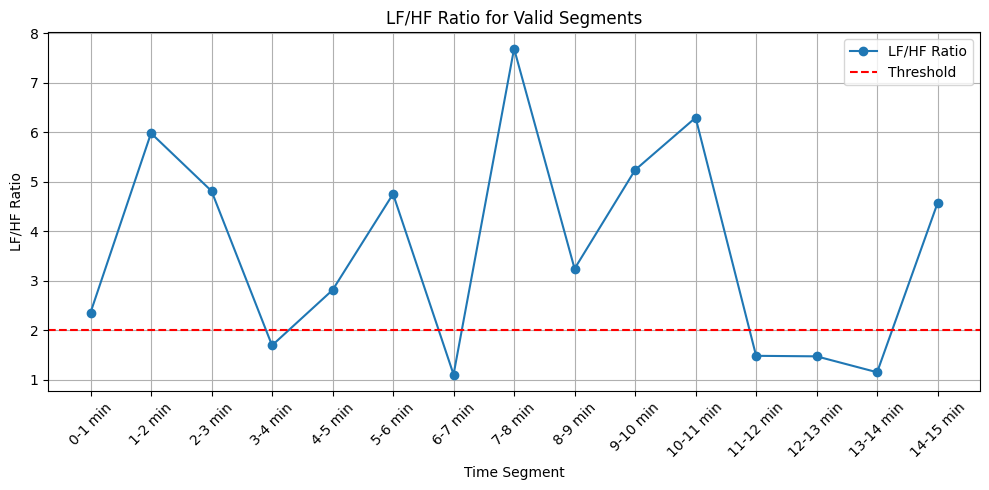

In [30]:
# Tính ngưỡng cho chỉ số LF/HF
lfhf_array = np.array(lf_hf_ratios)
valid_ratios = lfhf_array[~np.isnan(lfhf_array)]
mean_ratio = np.mean(valid_ratios)
std_ratio = np.std(valid_ratios)
# k = 2
# threshold = mean_ratio + 2 * std_ratio
threshold =2

print(f"Ngưỡng LF/HF: {threshold:.6f}")

num_anomalies = 0
time_labels = list(segments.keys())
for i, label in enumerate(time_labels):
    ratio = lf_hf_ratios[i]
    if np.isnan(ratio):
        status = "Undefined (HF=0)"
    elif ratio > threshold:
        status = "Anomaly"
        num_anomalies += 1
    else:
        status = "Normal"
    print(f"Đoạn {label}: {status}, LF/HF = {ratio:.6f}")

print(f"Số đoạn bất thường phát hiện: {num_anomalies}")

# Vẽ biểu đồ tỉ số LF/HF và ngưỡng
valid_ratios = [r for r in lf_hf_ratios if not np.isnan(r)]

plt.figure(figsize=(10, 5))
plt.plot(valid_labels, valid_ratios, marker='o', label='LF/HF Ratio')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xticks(rotation=45)
plt.title('LF/HF Ratio for Valid Segments')
plt.xlabel('Time Segment')
plt.ylabel('LF/HF Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Đoạn 0-1 min: Normal, Lỗi tái tạo = 0.0439
Đoạn 1-2 min: Normal, Lỗi tái tạo = 0.2158
Đoạn 2-3 min: Normal, Lỗi tái tạo = 0.2066
Đoạn 3-4 min: Normal, Lỗi tái tạo = 0.4852
Đoạn 4-5 min: Normal, Lỗi tái tạo = 0.0048
Đoạn 5-6 min: Normal, Lỗi tái tạo = 0.2364
Đoạn 6-7 min: Normal, Lỗi tái tạo = 0.0075
Đoạn 7-8 min: Normal, Lỗi tái tạo = 0.5792
Đoạn 8-9 min: Normal, Lỗi tái tạo = 0.1981
Đoạn 9-10 min: Normal, Lỗi tái tạo = 0.5528
Đoạn 10-11 min: Normal, Lỗi tái tạo = 0.6670
Đoạn 11-12 min: Normal, Lỗi tái tạo = 0.0121
Đoạn 12-13 min: Normal, Lỗi tái tạo = 0.0328
Đoạn 13-14 min: Anomaly, Lỗi tái tạo = 3.0372
Đoạn 14-15 min: Normal, Lỗi tái tạo = 0.1636
Số đoạn bất thường phát hiện: 1


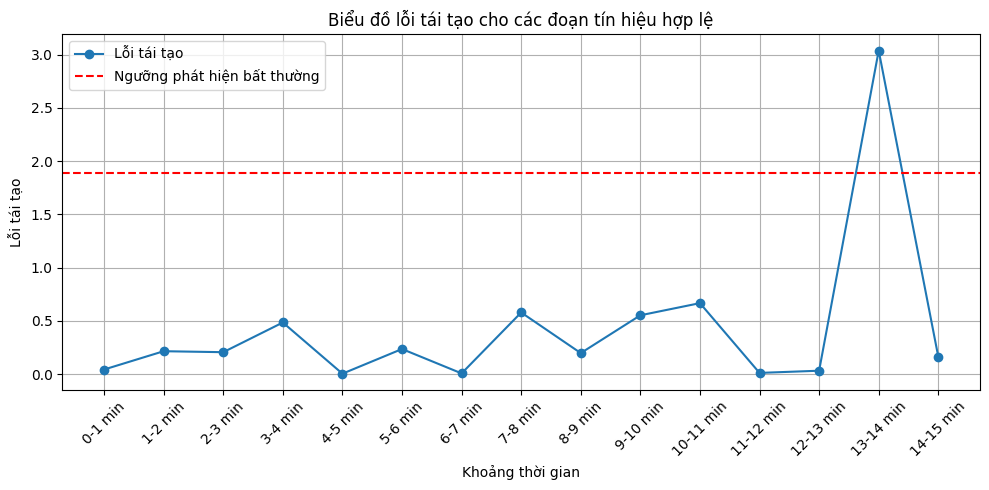

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Tạo feature vector X = [LF, HF, LF/HF]
X = []
valid_labels = []
for i, (lf, hf, ratio) in enumerate(zip(lf_powers, hf_powers, lf_hf_ratios)):
    if not np.isnan(ratio):
        X.append([lf, hf, ratio])
        valid_labels.append(list(segments.keys())[i])

X = np.array(X)

# Chuẩn hóa dữ liệu
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Xây mô hình Autoencoder
input_dim = X.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
bottleneck = Dense(2, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Huấn luyện
history = autoencoder.fit(X_norm, X_norm, epochs=100, batch_size=4, verbose=0)

# Tính lỗi tái tạo (reconstruction error)
X_pred = autoencoder.predict(X_norm)
reconstruction_errors = np.mean((X_pred - X_norm) ** 2, axis=1)

# Tính ngưỡng bất thường
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)
anomalies = reconstruction_errors > threshold

# In kết quả
for i, label in enumerate(valid_labels):
    status = "Anomaly" if anomalies[i] else "Normal"
    print(f"Đoạn {label}: {status}, Lỗi tái tạo = {reconstruction_errors[i]:.4f}")

print(f"Số đoạn bất thường phát hiện: {np.sum(anomalies)}")

# Vẽ biểu đồ lỗi tái tạo
plt.figure(figsize=(10, 5))
plt.plot(valid_labels, reconstruction_errors, marker='o', label='Lỗi tái tạo')
plt.axhline(threshold, color='red', linestyle='--', label='Ngưỡng phát hiện bất thường')
plt.xticks(rotation=45)
plt.title('Biểu đồ lỗi tái tạo cho các đoạn tín hiệu hợp lệ')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Lỗi tái tạo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


